In [21]:
from graph_traffic.explorative import describe_all_magnitudes, get_plot_n_observations
from graph_traffic.merge_data import merge_data
from graph_traffic.config import data_path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import pandas as pd
id_t = 1001

df = merge_data(id_t, mmagns=[])
df.head()

,date,id,intensidad,year,season,month,week,day_of_month,day_type,weekday,bank_holiday,working_day,school_holiday,hour,minute
51,2019-01-01 12:45:00,1001,1548.0,2019,winter,1,1,1,mon-fri,1,True,False,True,12.75,45
52,2019-01-01 13:00:00,1001,1020.0,2019,winter,1,1,1,mon-fri,1,True,False,True,13.00,0
53,2019-01-01 13:15:00,1001,1020.0,2019,winter,1,1,1,mon-fri,1,True,False,True,13.25,15
54,2019-01-01 13:30:00,1001,1668.0,2019,winter,1,1,1,mon-fri,1,True,False,True,13.50,30
55,2019-01-01 13:45:00,1001,2412.0,2019,winter,1,1,1,mon-fri,1,True,False,True,13.75,45


## Traffic along the week

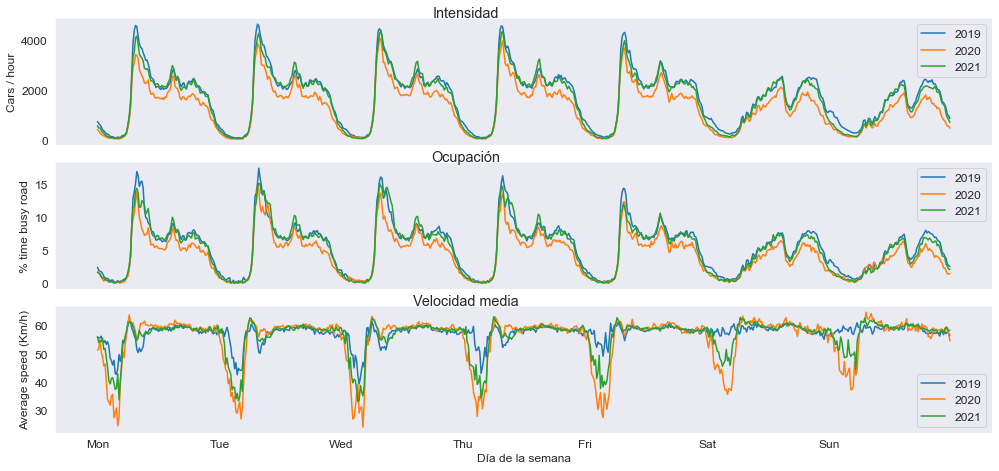

In [22]:
describe_all_magnitudes(id_t)

In [ ]:
ids_no_data = get_plot_n_observations()

C:\Users\Bened\PycharmProjects\madrid-traffic\graph_traffic\graph_traffic\explorative.py:82: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dates = dict.fromkeys(targets, pd.Series([]))


In [4]:
ids_no_data

{'intensidad': [10001,
  10001,
  10001,
  10002,
  10002,
  10002,
  10007,
  10007,
  10007,
  10008,
  10008,
  10008,
  10009,
  10009,
  10009,
  10024,
  10024,
  10024,
  10070,
  10070,
  10070,
  10072,
  10072,
  10072,
  10073,
  10073,
  10073,
  10074,
  10074,
  10074,
  10075,
  10075,
  10075,
  10105,
  10105,
  10105,
  10145,
  10145,
  10145,
  10146,
  10146,
  10146,
  10162,
  10162,
  10162,
  10163,
  10163,
  10163,
  10164,
  10164,
  10164,
  10222,
  10222,
  10222,
  10242,
  10242,
  10242,
  10282,
  10282,
  10282,
  10284,
  10284,
  10284,
  10285,
  10285,
  10285,
  10332,
  10332,
  10332,
  10359,
  10359,
  10359,
  10392,
  10392,
  10392,
  10411,
  10411,
  10411,
  10418,
  10418,
  10418,
  10464,
  10464,
  10464,
  10465,
  10465,
  10465,
  10466,
  10466,
  10466,
  10560,
  10560,
  10560,
  10565,
  10565,
  10565,
  10567,
  10567,
  10567,
  10680,
  10680,
  10680,
  10685,
  10685,
  10685,
  10749,
  10749,
  10749,
  10751,
  107

## Average traffic in a working day (Monday-Friday)

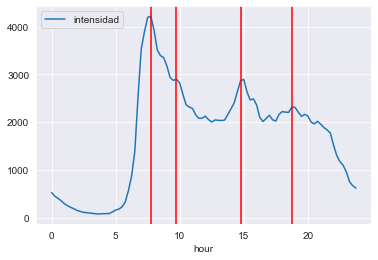

In [3]:
df[df.week_day<=4].groupby("hour").agg({"intensidad": "mean"}).plot()
plt.axvline(7.75, c="red") # 7:45
plt.axvline(9.75, c="red") # 9:45
plt.axvline(14.75, c="red") # 14:45
plt.axvline(18.75, c="red") # 18:45
plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105121 entries, 0 to 105120
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date                 105121 non-null  datetime64[ns]
 1   id                   93912 non-null   float64       
 2   intensidad           81909 non-null   float64       
 3   ocupacion            70738 non-null   float64       
 4   vmed                 81679 non-null   float64       
 5   temperatura          91722 non-null   float64       
 6   humedad_relativa     89856 non-null   float64       
 7   presion_barometrica  83833 non-null   float64       
 8   radiacion_solar      91785 non-null   float64       
 9   precipitacion        90353 non-null   float64       
 10  dir_viento           91766 non-null   float64       
 11  velocidad_viento     91714 non-null   float64       
 12  year                 105121 non-null  int64         
 13  season        

## Distribution of the target variable

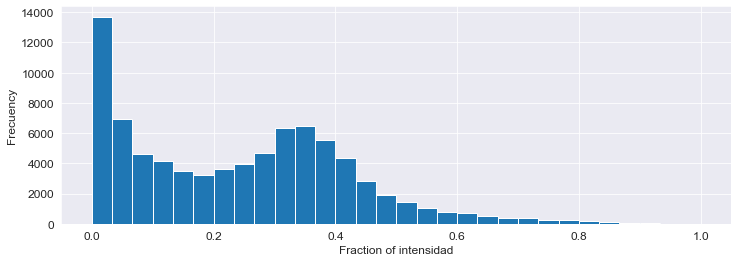

In [23]:
target = "intensidad"
y = df[target] / df[target].max()

fig, ax = plt.subplots(figsize=(12, 4))
y.hist(bins=30, ax=ax)
_ = ax.set(
    xlabel=f"Fraction of {target}",
    ylabel="Frecuency",
)

## Seasonal time plots

<AxesSubplot:xlabel='week', ylabel='intensidad'>

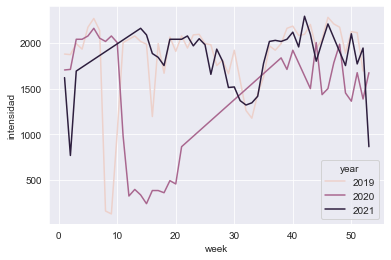

In [8]:
by = "week"
dfm = df.groupby([by, "year"]).agg({"intensidad": "median"}).reset_index()
sns.lineplot(data=dfm, x="week", y="intensidad", hue="year")

<AxesSubplot:xlabel='month', ylabel='intensidad'>

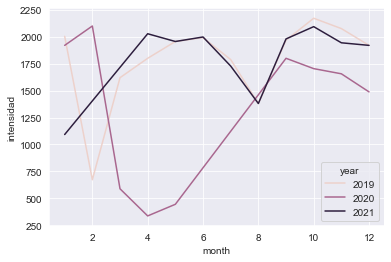

In [9]:
by = "month"
dfm = df.groupby([by, "year"]).agg({"intensidad": "median"}).reset_index()
sns.lineplot(data=dfm, x=by, y="intensidad", hue="year")

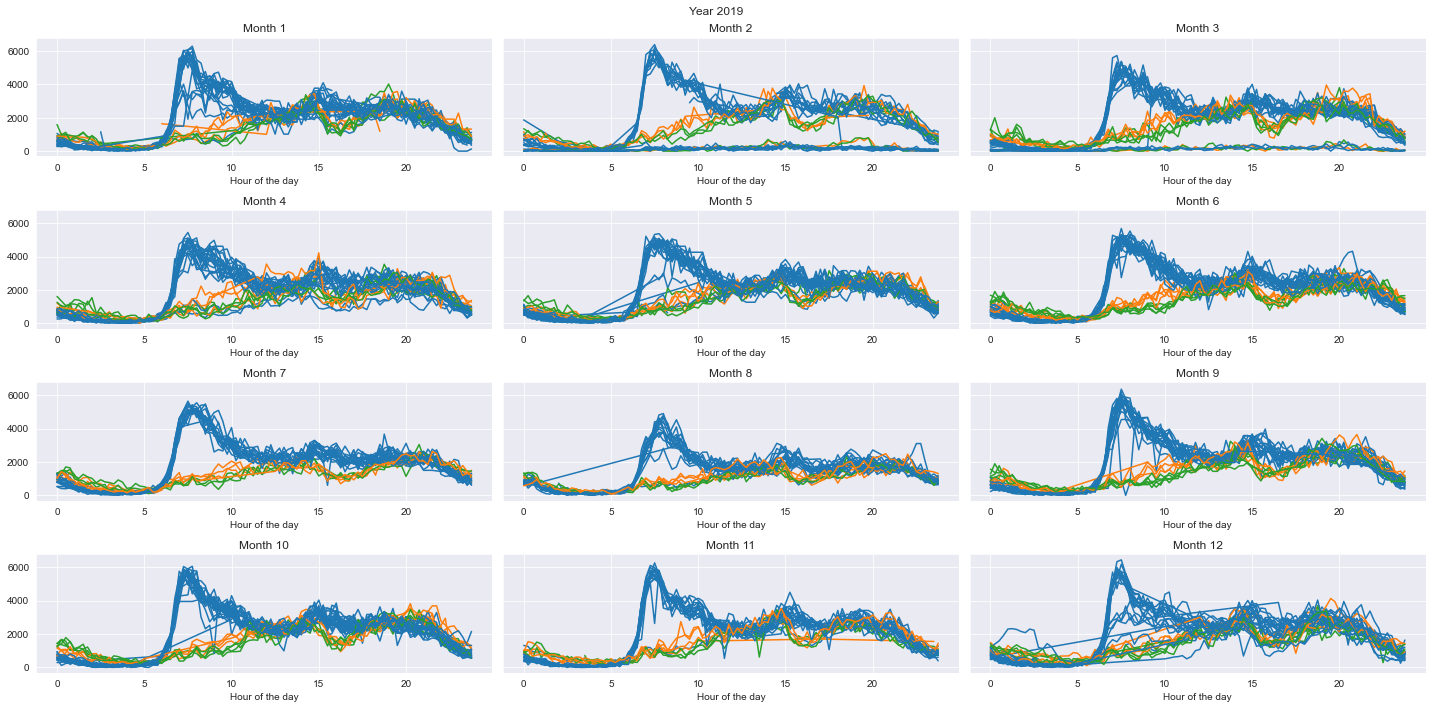

In [10]:
year = 2019

fig, axs = plt.subplots(4, 3, figsize=(20, 10), sharey=True)

dict_colors = {
    'mon-fri': 'tab:blue',
    'sat': 'tab:orange',
    'sun': 'tab:green'
}
for month in range(1, 13):

    line = (month-1) // 3
    column = (month-1) % 3
    ax = axs[line][column]

    dfm = df[(df.month == month) & (df.year==year)]

    days = dfm.day_of_month.unique()

    for d in days:
        dff = dfm[dfm.day_of_month == d]
        color = dict_colors[dff.day_type.values[0]]
        ax.plot(dff.hour, dff.intensidad, color=color)
    ax.set_title(f"Month {month}")
    ax.set_xlabel("Hour of the day")

plt.suptitle(f"Year {year}")
fig.tight_layout()

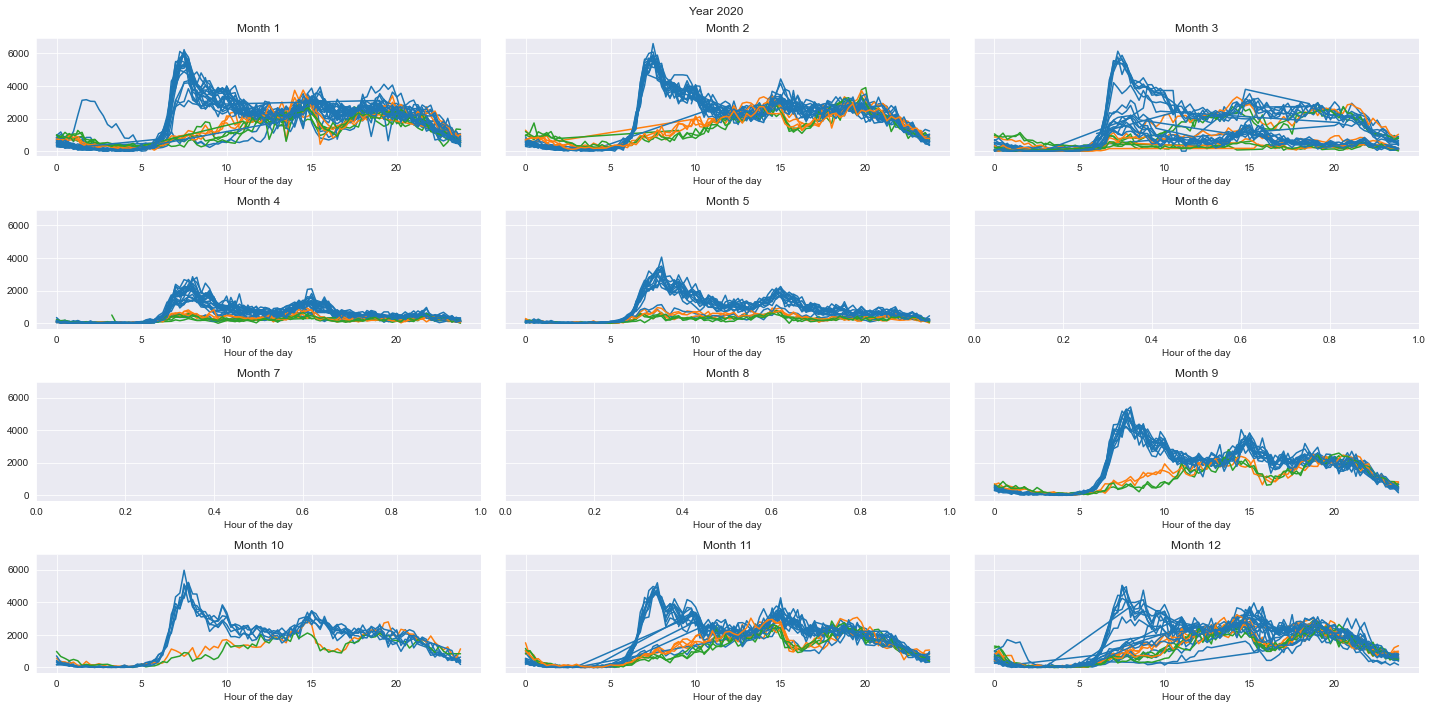

In [11]:
year = 2020

fig, axs = plt.subplots(4, 3, figsize=(20, 10), sharey=True)

dict_colors = {
    'mon-fri': 'tab:blue',
    'sat': 'tab:orange',
    'sun': 'tab:green'
}
for month in range(1, 13):

    line = (month-1) // 3
    column = (month-1) % 3
    ax = axs[line][column]

    dfm = df[(df.month == month) & (df.year==year)]

    days = dfm.day_of_month.unique()

    for d in days:
        dff = dfm[dfm.day_of_month == d]
        color = dict_colors[dff.day_type.values[0]]
        ax.plot(dff.hour, dff.intensidad, color=color)
    ax.set_title(f"Month {month}")
    ax.set_xlabel("Hour of the day")

plt.suptitle(f"Year {year}")
fig.tight_layout()

## Correlation between variables

In [ ]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Explore meteorological data

In [36]:
from graph_traffic.config import data_path
import os
import pandas as pd

meteo_path = data_path + "/03-by-location/meteo"

mean_zero = []
values = pd.DataFrame()

for station in os.listdir(meteo_path):
    df = pd.read_csv(meteo_path + "/" + station).dropna(subset=["precipitacion"])
    if not df.empty:
        mean_zero.append((df.precipitacion == 0).mean())
        values = pd.concat([values, df[["fecha", "estacion", "precipitacion"]]], ignore_index=True)

In [22]:
import numpy as np
np.mean(mean_zero)

0.9553603254021632

In [41]:
values.precipitacion.quantile([0.98+0.001*n for n in range(21)])

0.980     0.4
0.981     0.5
0.982     0.5
0.983     0.6
0.984     0.6
0.985     0.7
0.986     0.8
0.987     0.8
0.988     0.9
0.989     1.0
0.990     1.1
0.991     1.2
0.992     1.4
0.993     1.6
0.994     1.8
0.995     2.0
0.996     2.4
0.997     2.9
0.998     3.6
0.999     5.0
1.000    27.4
Name: precipitacion, dtype: float64

In [42]:
values.sort_values("precipitacion", ascending=False).head(50)

,fecha,estacion,precipitacion
20340,2021-04-27 23:00:00,102.0,27.4
5798,2019-08-30 20:00:00,102.0,26.9
23351,2021-09-01 06:00:00,102.0,26.7
49539,2021-09-01 06:00:00,103.0,26.0
61977,2019-11-22 10:00:00,106.0,24.4
110674,2019-08-26 20:00:00,108.0,22.4
119816,2020-09-19 02:00:00,108.0,22.2
100251,2021-06-16 22:00:00,107.0,21.4
158835,2019-08-26 20:00:00,39.0,20.4
228404,2021-09-01 06:00:00,56.0,20.4


In [30]:
27.4 in values.values

True

In [29]:
values.values

array([0., 0., 0., ..., 0., 0., 0.])

In [43]:
df

,estacion,fecha,velocidad_viento,dir_viento,temperatura,humedad_relativa,presion_barometrica,radiacion_solar,precipitacion


<AxesSubplot:>

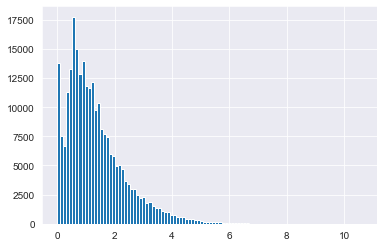

In [48]:
values = pd.DataFrame()

for station in os.listdir(meteo_path):
    df = pd.read_csv(meteo_path + "/" + station).dropna(subset=["velocidad_viento"])
    if not df.empty:
        values = pd.concat([values, df[["fecha", "estacion", "velocidad_viento"]]], ignore_index=True)

values.velocidad_viento.hist(bins=100)

<AxesSubplot:>

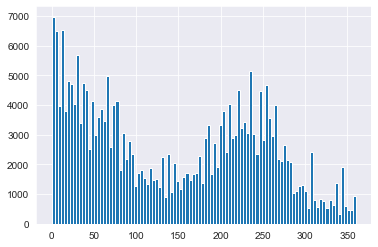

In [51]:
values = pd.DataFrame()

for station in os.listdir(meteo_path):
    df = pd.read_csv(meteo_path + "/" + station).dropna(subset=["dir_viento"])
    if not df.empty:
        values = pd.concat([values, df[["fecha", "estacion", "dir_viento"]]], ignore_index=True)

values.dir_viento.hist(bins=100)